# t- tests

* t-tests are used to compare two means to see if they are         different from   each other. 
* The test is often used to compare the mean of some continuous    variable across two groups. 
* For example, it might be used to compare the mean income of      college graduates and people who have not graduated from         college.

* A t-test can also be used like the goodness-of-fit chi-squared   to compare the mean from one group to a population mean. 
* For example, the t-test could be used to see if the mean age in   a sample   is the same as the mean age in the population that    was sampled.”

TYPES OF t-tests:

* One-sample t-test
* Independent-samples t-test
* Dependent-samples t-test (also known as the paired-samples t-test or      paired t-test). 

All three of these tests compare two means, but each test is used in a different situation, similar to how the goodness-of-fit chi-squared and the chi-squared test of independence were used in the two different situations.

We will check the assumptions of each t-test and discuss alternate analysis methods when the assumptions are not met.

#######################################################################

* The two blood pressure measures, are systolic and diastolic. 
* Systolic blood pressure is measured in millimeters of mercury, or mmHG,   and ranges from 74 to 238; diastolic blood pressure is also measured in   mmHG and ranges from 0 to 120. 
* National Health and Nutrition Examination Survey (NHANES) conducted     regularly by the Centers for Disease Control and Prevention (CDC)       collects blood pressure measurements from participants. 

## import the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
nhanes_2016= pd.read_csv('nhanes_2015-2016_ch6.csv')

In [3]:
nhanes_2016.head()

,SEQN,cycle,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,...,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BPXSY4,BPXDI4,BPAEN4,file_name,begin_year,end_year
0,83732,2015-2016,9,2,1,62,NaN,3,3,1,...,2.0,116.0,62.0,2.0,NaN,NaN,NaN,BPX_I,2015,2016
1,83733,2015-2016,9,2,1,53,NaN,3,3,1,...,2.0,134.0,82.0,2.0,NaN,NaN,NaN,BPX_I,2015,2016
2,83734,2015-2016,9,2,1,78,NaN,3,3,2,...,2.0,136.0,46.0,2.0,NaN,NaN,NaN,BPX_I,2015,2016
3,83735,2015-2016,9,2,2,56,NaN,3,3,2,...,2.0,136.0,70.0,2.0,NaN,NaN,NaN,BPX_I,2015,2016
4,83736,2015-2016,9,2,2,42,NaN,4,4,2,...,2.0,98.0,56.0,2.0,NaN,NaN,NaN,BPX_I,2015,2016


Text(0.5, 1.0, 'Histogram of Systolic Blood Pressure')

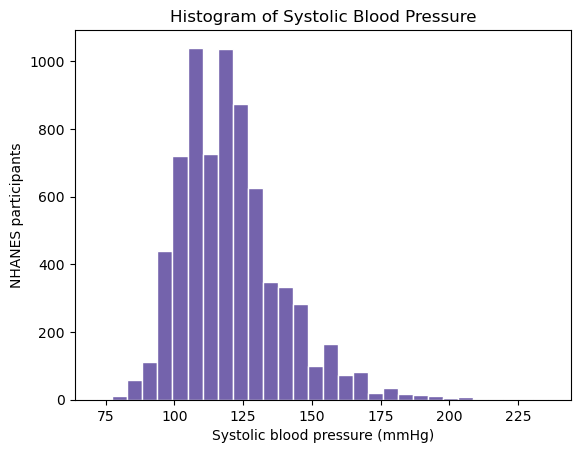

In [4]:
import matplotlib.pyplot as plt

sbp_histo = nhanes_2016['BPXSY1'].plot.hist(color='#7463AC', edgecolor='white',bins=30)
plt.xlabel('Systolic blood pressure (mmHg)')
plt.ylabel('NHANES participants')
plt.title('Histogram of Systolic Blood Pressure')

* Plotting the graph with different colors for normal and at-risk range
** Normal blood pressure for most adults is defined as a systolic pressure of less than 120

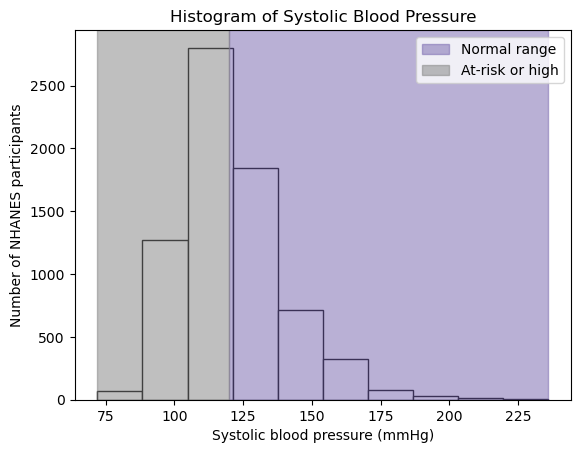

In [5]:
# Filter out missing values
sbp_values = nhanes_2016['BPXSY1'].dropna()

# Create the histogram
plt.figure()
plt.hist(sbp_values, bins=10, color='white', edgecolor='black')

# Add shading for different ranges
plt.axvspan(120, sbp_values.max(), color='#7463AC', alpha=0.5, label='Normal range')
plt.axvspan(sbp_values.min(), 120, color='gray', alpha=0.5, label='At-risk or high')

# Set labels and title
plt.xlabel('Systolic blood pressure (mmHg)')
plt.ylabel('Number of NHANES participants')
plt.title('Histogram of Systolic Blood Pressure')

# Add legend
plt.legend()


For diastolic blood pressure, the CDC defined normal as < 80 mmHG, at-risk as 80–89 mmHG, and high as 90+ mmHg. 
variable name in the above code for systolic changed to BPXDI1 (diastolic) and the threshold is set to 80mmHG

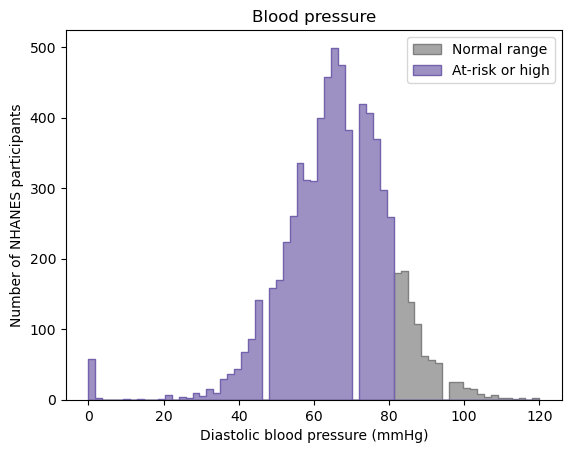

In [6]:


nhanes_2016["BPXDI1_category"] = nhanes_2016["BPXDI1"] > 80

sns.histplot(data=nhanes_2016, x="BPXDI1", hue="BPXDI1_category", element="step", fill=True, alpha=0.7, palette=["#7463AC", "gray"])
plt.xlabel("Diastolic blood pressure (mmHg)")
plt.ylabel("Number of NHANES participants")
plt.title("Blood pressure")
plt.legend(labels=["Normal range", "At-risk or high"])



Interpretation:
* The diastolic histogram had a tiny bar all the way at 0, which   seemed like a terrible blood pressure.
* They were probably a data entry problem or some missing value    coding they had missed in the codebook.

* It appeared that more people were within the normal range for    diastolic blood pressure than were in the normal range for       systolic blood pressure. 

* Based on observing the histograms, it could be predicted that     the mean systolic blood pressure in the sample was higher than   120.

## Comparing a sample mean to a population mean with a one-sample t-test

TYPES OF t-test:

* One-sample t-test: compares a mean to a population or            hypothesized value
* Independent-samples t-test: compares the means of two unrelated   groups
* Dependent-samples t-test: compares the means of two related      groups

For the blood pressure problem:

* Comparing the mean in the NHANES data to a hypothesized value    like 120 can be done with a one-sample t-test. The one-sample    t-test compares a sample mean to a hypothesized or population    mean.

NHST Process:

Step 1: Write the null and alternate hypotheses.
Step 2: Compute the test statistic.
Step 3: Calculate the probability that your test statistic is at         least as big as it is if there is no relationship (i.e.,         the null hypothesis is true).
Step 4: If the probability that the null hypothesis is true is           very small, usually less than 5%, reject the null                hypothesis.
Step 5: If the probability that the null hypothesis is true is           not small, usually 5% or greater, retain the null                hypothesis.


NHST STEP 1: Write the null and alternate hypotheses

  H0: There is no difference between mean systolic blood pressure       in the United States and the cutoff for normal blood             pressure, 120 mmHG.
  HA: There is a difference between mean systolic blood pressure       in the United States and the cutoff for normal blood             pressure, 120 mmHG.

Recollect from Chapter 4:
* The standard deviation is a measure of the variability in the    sample, while the standard error is an estimate of how closely   the sample represents the population.
* The standard error approximates the standard deviation of the    sampling distribution


NHST STEP 2: Compute the test statistic

The one-sample t-test uses the t-statistic (sort of like a z-statistic) .

* Quite similar to z-statistic calculation but in t-statistic we   compute standard error (se) instead of standard deviation (sd)
* z shows how many sample standard deviations some value is away   from the mean, while t shows how many standard errors (i.e.,     population standard deviations) some value is away from the      mean.


n = 9544 obs. as shown in the Environment pane

In [7]:
nhanes_2016_filtered = nhanes_2016.dropna(subset=["BPXSY1"])
mean_sbp = np.mean(nhanes_2016_filtered["BPXSY1"])
sd_sbp = np.std(nhanes_2016_filtered["BPXSY1"])
n_sbp = len(nhanes_2016_filtered["BPXSY1"])

print("Mean systolic blood pressure:", mean_sbp)
print("Standard deviation of systolic blood pressure:", sd_sbp)
print("Number of observations:", n_sbp)

Mean systolic blood pressure: 120.53939818054583
Standard deviation of systolic blood pressure: 18.61561817253788
Number of observations: 7145


Interpretation:
* The value of n.sbp in the output was much lower than the 9,544   observations shown in the Environment pane. 
* drop_na(BPXSY1) had removed all the people from the sample who   were missing data on the BPXSY1 variable, which was over 2,000   people.

In blood pressure example,
  mean of variable x = 120.5394
  population mean/hypothesized value of the variable = 120
  sample standard deviation = 18.61692
  sample size = 7145
  
  t= (120.5394-120)/(18.61692/square_root(7145)) =2.45

In [8]:
from scipy import stats

# Drop missing values
cleaned_data = nhanes_2016['BPXSY1'].dropna()

# Perform t-test
t_statistic, p_value = stats.ttest_1samp(cleaned_data, 120)

print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: 2.449078679903307
P-value: 0.014346071955927013


NHST STEP 3: Calculate the probability that your test statistic is at least as big as it is if there is no relationship (i.e., the null is true)

* The output from the t-test showed that this probability was      0.014, the p-value. 
* The interpretation of this value is that there is a 1.4%         probability that a t-statistic would be 2.4491 or greater if     the null hypothesis were true. 
* That is, there is a 1.4% probability of getting a t-statistic    of 2.4491 or greater for a mean of 120.54 in this sample if it   came from a population with a mean systolic blood pressure of    120.

NHST STEPS 4 and 5: Interpret the probability and write a conclusion

* Even though the difference between the mean systolic blood       pressure of 120.54 and the hypothesized value of 120 is small,   it is statistically significant. 
* The probability of this sample coming from a population where    the mean systolic blood pressure is actually 120 is just 1.4%. 
* This sample is likely to be from a population with a higher      mean blood pressure.

How to report?
    The mean systolic blood pressure in a sample of 7,145 people     was 120.54 (sd = 18.62). A one-sample t-test found this mean     to be statistically significantly different from the             hypothesized mean of 120 [t(7144) = 2.449; p = 0.014]. The       sample likely came from a population with a mean systolic        blood pressure not equal to 120.
    
## Comparing two unrelated sample means with an independent-samples t-test

* Instead of comparing one mean to a hypothesized or population    mean, the independent-samples t-test compares the means of two   groups to each other. 
* For example, the NHANES data set includes sex measured in two    categories: males and females. 
* We might be interested in whether the mean systolic blood        pressure was the same for males and females in the population. 
* That is, do males and females in the sample come from a          population where males and females have the same mean systolic   blood pressure?
  Independent-samples t-test could be used to find out the         answer.

Note:
* Blood pressure variable measured on a continuum and treated as   continuous, and the sex variable that is categorical with only   two categories measured by the NHANES. 
* Since we are comparing blood pressure across groups, we          start with some group means.

Sex variable is RIAGENDR where
    1 is the code value for Male 
    2 is the code value for Female

In [9]:
group_means = nhanes_2016.groupby('RIAGENDR')['BPXSY1'].mean()
print(group_means)


RIAGENDR
1    122.176672
2    118.969016
Name: BPXSY1, dtype: float64


It certainly looked like there might be a difference, but it was unclear who has higher or lower blood pressure since the categories of sex are not labeled clearly.

In [10]:
nhanes_2016_cleaned = nhanes_2016.replace({'RIAGENDR': {1: 'Male', 2: 'Female'}})
nhanes_2016_cleaned = nhanes_2016_cleaned.rename(columns={'RIAGENDR': 'sex', 'BPXSY1': 'systolic'})


In [11]:
group_means = nhanes_2016_cleaned.groupby('sex')['systolic'].mean()
print(group_means)

sex
Female    118.969016
Male      122.176672
Name: systolic, dtype: float64


Interpretation:
* It appeared that males had a higher mean systolic blood          pressure than females in the sample. 
* A graph might provide a little more perspective, so we plot a    density plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


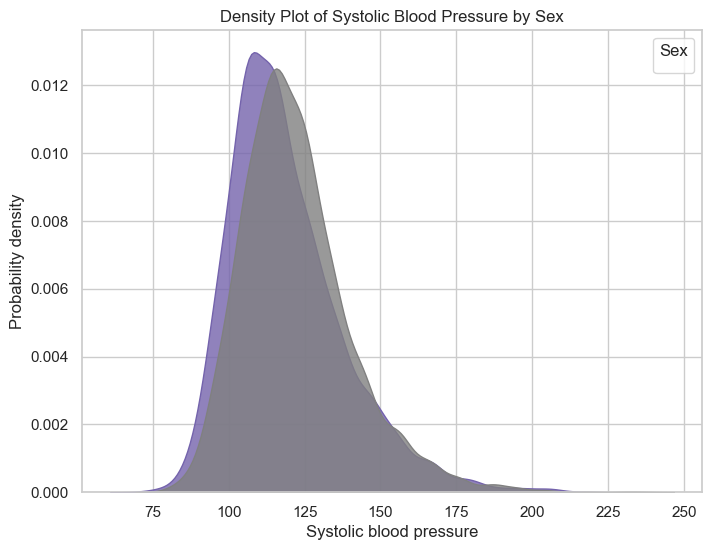

In [12]:

sns.set(style="whitegrid", palette=['gray', '#7463AC'])

plt.figure(figsize=(8, 6))
sns.kdeplot(data=nhanes_2016_cleaned, x="systolic", hue="sex", fill=True, alpha=0.8)
plt.xlabel("Systolic blood pressure")
plt.ylabel("Probability density")
plt.title("Density Plot of Systolic Blood Pressure by Sex")
plt.legend(title="Sex")



Interpretation:
* Distributions that were right skewed, with the distribution for   males shifted to the right of the distribution for females and   showing higher values overall. 

NHST STEP 1: Write the null and alternate hypotheses

  H0:There is no difference in mean systolic blood pressure           between males and females in the U.S. population.
  HA:There is a difference in mean systolic blood pressure            between males and females in the U.S. population.

NHST STEP 2: Compute the test statistic

* The test statistic for the independent-samples t-test is a       little more complicated to calculate since it now includes the   means from both the groups in the numerator and the standard     errors from the groups in the denominator. 
* In the independent-samples t-test formula, m1 is the mean of     one group and m2 is the mean of the other group; the difference   between the means makes up the numerator. The larger the         difference between the group means, the larger the numerator     will be and the larger the t-statistic will be!
* The denominator contains the variances for the first group, 
  s12 , and the second group, s22 , along with the sample sizes    for each group, n1 and n2.

m1 = 122.1767 
m2 = 118.9690
s1 = 329.2968
s2 = 358.2324
n1 = 3498
n2 = 3647

t= (122.1767-118.9690)/(square_root((329.2968/3498)+(358.2324/3647)))= 7.31

In [13]:
import pandas as pd

grouped_data = nhanes_2016_cleaned.dropna(subset=["systolic"]).groupby("sex")
summary_stats = grouped_data["systolic"].agg(["mean", "var", "size"]).rename(columns={"mean": "m.sbp", "var": "var.sbp", "size": "samp.size"})
summary_stats = summary_stats.applymap("{:.4f}".format)

print(summary_stats)


           m.sbp   var.sbp  samp.size
sex                                  
Female  118.9690  358.2324  3647.0000
Male    122.1767  329.2968  3498.0000


In [14]:
import scipy.stats as stats

males_systolic = nhanes_2016_cleaned[nhanes_2016_cleaned["sex"] == "Male"]["systolic"].dropna()
females_systolic = nhanes_2016_cleaned[nhanes_2016_cleaned["sex"] == "Female"]["systolic"].dropna()

twosample_ttest = stats.ttest_ind(males_systolic, females_systolic)

print("T-statistic:", twosample_ttest.statistic)
print("P-value:", twosample_ttest.pvalue)

T-statistic: 7.307072615968821
P-value: 3.026387220107478e-13


NHST STEP 3: Calculate the probability that your test statistic is at                 least as big as it is if there is no relationship (i.e., the              null is true)

* The p-value = .0000000000002886. 
* Using p < .05 instead, the interpretation is value of this t-statistic   would happen with a probability of much less than 5% if the null         hypothesis were true.


NHST STEPS 4 and 5: Interpret the probability and write a conclusion

* In this case, the t-statistic was definitely in the rejection region,    so there was sufficient evidence to reject the null hypothesis in favor   of the alternate hypothesis. 
* Even though the difference between the mean systolic blood pressure for   males and females was small, it was statistically significant. 


Interpretation:
    There was a statistically significant difference [t(7143) = 7.31; p < .05] in mean systolic blood pressure between males (m = 122.18) and females (m = 118.97) in the sample. The sample was taken from the U.S. population, indicating that males in the United States likely have a different mean systolic blood pressure than females in the United States. The difference between male and female mean systolic blood pressure was 3.21 in the sample; in the population this sample came from, the difference between male and female mean blood pressure was likely to be between 2.35 and 4.07 (d = 3.21; 95% CI: 2.35–4.07).

##Comparing two related sample means with a dependent-samples t-test#############################################

* Sometimes the means to compare would be related. 
* This usually happens in one of two ways; either the same people are      measured twice (before and after), or people in the sample are siblings   or spouses or co-workers or have some other type of relationship

* In the dependent-samples t-test formula, the md is the mean of the       differences between the related measures, the sd2 is the variance of     the mean difference between the measures, and nd is the sample size.

Here,
md : the mean of the differences between the related measures
sd2: the variance of the mean difference between the measures, and 
nd : the sample size.

* Dependent-samples t-test worked a little differently from the            independent-samples t-test. 
* In this case, the formula uses the mean of the differences between the   two related measures (md). 
* For example, if systolic blood pressure were measured to be 110 before   going to the dentist and 112 after going to the dentist, the difference   between the two measures would be 2. 
* If another subject were measured as having 115 before the dentist and    110 after, the difference between the two measures would be –5. 
* In a study of blood pressure before and after going to the dentist, the   numerator for the dependent-samples t-test would take the mean of those   differences, 2 and –5, and subtract zero. 
* The reason it would subtract zero is that zero is the mean difference    if the measures of blood pressure were exactly the same before and       after the dentist visit—this is the null hypothesis.

* Renaming variables and finding the difference
* BPXSY1 -> first systolic pressure
* BPXSY2 -> second systolic pressure

In [15]:
nhanes_2016_cleaned = nhanes_2016_cleaned.rename(columns={"BPXSY1": "systolic", "BPXSY2": "systolic2"})
nhanes_2016_cleaned["diff_syst"] = nhanes_2016_cleaned["systolic"] - nhanes_2016_cleaned["systolic2"]


In [16]:
import numpy as np

mean_diff = np.mean(nhanes_2016_cleaned["diff_syst"].dropna())
print("Mean difference:", mean_diff)


Mean difference: 0.5449936628643853


Interpretation:
* The mean difference between the first and second systolic blood          pressure measures was 0.54, which was not zero, but it was pretty        small. 
* On average, the systolic blood pressure measure showed a difference of   0.54 between the first measure and the second measure on the same        person in the NHANES 2015–2016 data set.

CREATING A HISTOGRAM TO CHECK THE DISTRIBUTION

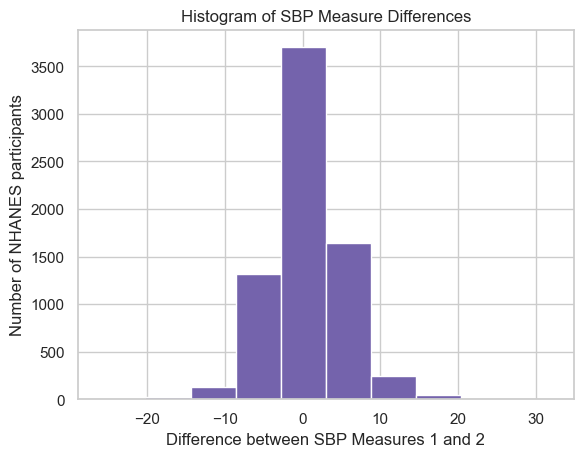

In [17]:
import matplotlib.pyplot as plt

plt.hist(nhanes_2016_cleaned["diff_syst"].dropna(), bins=10, color="#7463AC", edgecolor="white")
plt.xlabel("Difference between SBP Measures 1 and 2")
plt.ylabel("Number of NHANES participants")
plt.title("Histogram of SBP Measure Differences")
plt.show()


Interpretation:
* The distribution of differences looked close to normal and the center    was near zero, but maybe not exactly zero. 
* The mean difference was .54. 
* If Measures 1 and 2 were exactly the same for each person, there would   just be one long bar at 0 in the histogram and the mean difference       would be zero. 

Next, using the NHST process, we can to see if the md of 0.54 was statistically significantly different from the zero (i.e., if the first and second measures of systolic blood pressure had been exactly the same for each person.)

## NHST FOR related sample t-test

NHST STEP 1: Write the null and alternate hypotheses

  H0: There is no difference between Measures 1 and 2 for systolic blood       pressure.
  HA: There is a difference between Measures 1 and 2 for systolic blood        pressure.
  
NHST STEP 2: Compute the test statistic

To substitute the mean, standard deviation, and sample size of diff.syst into formula for the dependent-samples t-test statistic,we needed to add variance and sample size to the descriptive statistics code.


In [18]:
mean_diff = nhanes_2016_cleaned["diff_syst"].dropna().mean()
var_diff = nhanes_2016_cleaned["diff_syst"].dropna().var()
sample_size = nhanes_2016_cleaned["diff_syst"].dropna().shape[0]

print("Mean:", mean_diff)
print("Variance:", var_diff)
print("Sample Size:", sample_size)



Mean: 0.5449936628643853
Variance: 23.99082739784688
Sample Size: 7101


md : the mean of the differences between the related measures (0.5449937)
sd2: the variance of the mean difference between the measures (23.99083)
, and 
nd : the sample size (7101)

  t= (0.5449937-0)/square_root(23.99083/7101) = 9.38



In [23]:
from scipy.stats import ttest_rel, t
import numpy as np

systolic1 = nhanes_2016_cleaned["systolic"]
systolic2 = nhanes_2016_cleaned["systolic2"]

# Drop missing values from both variables simultaneously
missing_mask = np.logical_or(np.isnan(systolic1), np.isnan(systolic2))
systolic1 = systolic1[~missing_mask]
systolic2 = systolic2[~missing_mask]

# Perform t-test
result = ttest_rel(systolic1, systolic2)

# Compute 95% confidence interval
mean_diff = np.mean(systolic1 - systolic2)
se_diff = np.std(systolic1 - systolic2, ddof=1) / np.sqrt(len(systolic1))
confidence_interval = t.interval(0.95, len(systolic1) - 1, loc=mean_diff, scale=se_diff)

print("T-statistic:", result.statistic)
print("P-value:", result.pvalue)
print("95% Confidence Interval:", confidence_interval)


T-statistic: 9.376237415789133
P-value: 9.01033434366221e-21
95% Confidence Interval: (0.43105136075341277, 0.6589359649753579)



	Paired t-test

data:  nhanes.2016.cleaned$systolic and nhanes.2016.cleaned$systolic2
t = 9.3762, df = 7100, p-value < 9.01033434366221e-21
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.4310514 0.6589360
sample estimates:
mean of the differences 
              0.5449937 

NHST STEP 3: Calculate the probability that your test statistic is at least as big as it is if there is no relationship (i.e., the null is true)

p-value < 2.2e-16 which is well below 0.05 

NHST STEP 4 and 5: Interpret the probability and write a conclusion

* The t-statistic has a low probability, so there was sufficient evidence   to reject the null hypothesis in favor of the alternate hypothesis. 
* Even though the mean difference between the first and second measures    was small, it was statistically significant. 

How to report?
* The mean difference between two measures of systolic blood pressure was   statistically significantly different from zero [t(7100) = 9.38; p <     .05]. 
* The positive difference of 0.54 indicated that systolic blood pressure   was significantly higher for the first measure compared to the second    measure. 
* While the mean difference in the sample was .54, the mean difference     between the first and second measures in the population was likely       between 0.43 and 0.66 (md = 0.54; 95% CI: 0.43–0.66).

What does all this demonstrate?
* While it was not zero, as it would be if the measures were completely    consistent, it was .54 on average, which is not a large clinical         difference (Lane et al., 2002). 
* This example and the small but significant differences for the           one-sample and independent-samples t-tests demonstrated that results     can be statistically significant but not meaningful.

Why could have this happened?
* Larger sample sizes in these three formulas resulted in smaller          denominator values, which, in turn, resulted in larger t-statistics. 